In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [3]:
# Connect to SQLite database
con = sqlite3.connect('./data/sd_competencia/sd_competencia_db.db')
cur = con.cursor()

In [4]:
# Create dataframe from connection

df = pd.read_sql_query('SELECT * FROM Demanda_Historica', con)
df.head()


id_llegada        fecha_llegada  tipo_vehiculo  CCA0001_SN_01  \
0           1  2024-03-01 00:00:00         Camion              1   
1           2  2024-03-01 00:00:00         Camion              0   
2           3  2024-03-01 00:00:00         Camion              0   
3           4  2024-03-01 00:00:00  Tracto-Camion              0   
4           5  2024-03-01 00:00:00  Tracto-Camion              3   

   CCA0001_SB_01  CCA0001_SG_01  CCA0001_SC_01  CCA0001_SN_02  CCA0001_SB_02  \
0              0              3              0              0              0   
1              2              2              0              5              5   
2              0              2              3              3              0   
3              6              0              0              0              0   
4              0              1              2              3              0   

   CCA0001_SG_02  ...  CT0008_03033  CT0008_03034  CT0008_03035  CT0008_03036  \
0              0  ...            10             0             0             0   
1              0  ...             0             0             0             0   
2              0  ...             6             0             4             8   
3              5  ...             8             0             0             7   
4              5  ...             8             0             0             0   

   CT0008_03041  CT0008_03042  CT0008_03043  CT0008_03044  CT0008_03045  \
0             0             0             0             7             0   
1             0             6             3             8             0   
2             0             0             4             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   CT0008_03046  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 1270 columns]

In [5]:
# Dropping unnecessary columns

df = df.drop(columns={'id_llegada', 'tipo_vehiculo'})


In [6]:
# Grouping SKUs by date

df['fecha_llegada'] = pd.to_datetime(df['fecha_llegada'])

df = df.groupby('fecha_llegada').sum().reset_index()

df = df.set_index('fecha_llegada')


df.head()


CCA0001_SN_01  CCA0001_SB_01  CCA0001_SG_01  CCA0001_SC_01  \
fecha_llegada                                                               
2024-03-01               160            232            167            198   
2024-03-02               202            212            194            236   
2024-03-03               162            151            166            143   
2024-03-04               210            212            227            185   
2024-03-05                32             15             39             37   

               CCA0001_SN_02  CCA0001_SB_02  CCA0001_SG_02  CCA0001_SC_02  \
fecha_llegada                                                               
2024-03-01               200            196            146            153   
2024-03-02               178            140            135            158   
2024-03-03               145            182            170            175   
2024-03-04               171            195            268            215   
2024-03-05                29             28             21             22   

               CCA0001_SN_03  CCA0001_SB_03  ...  CT0008_03033  CT0008_03034  \
fecha_llegada                                ...                               
2024-03-01               130             75  ...           129            43   
2024-03-02               157             71  ...            54           132   
2024-03-03               118             80  ...            63            82   
2024-03-04               118             86  ...           113            95   
2024-03-05                15             13  ...             9            15   

               CT0008_03035  CT0008_03036  CT0008_03041  CT0008_03042  \
fecha_llegada                                                           
2024-03-01               58            74            80            28   
2024-03-02               46            41            84            58   
2024-03-03               95            60           102            49   
2024-03-04               44            56           104            49   
2024-03-05                0            17             8            21   

               CT0008_03043  CT0008_03044  CT0008_03045  CT0008_03046  
fecha_llegada                                                          
2024-03-01              102            89            16            73  
2024-03-02               85            66            48            86  
2024-03-03              107            69            62            84  
2024-03-04               95            58            49           137  
2024-03-05               41             7            10             0  

[5 rows x 1267 columns]

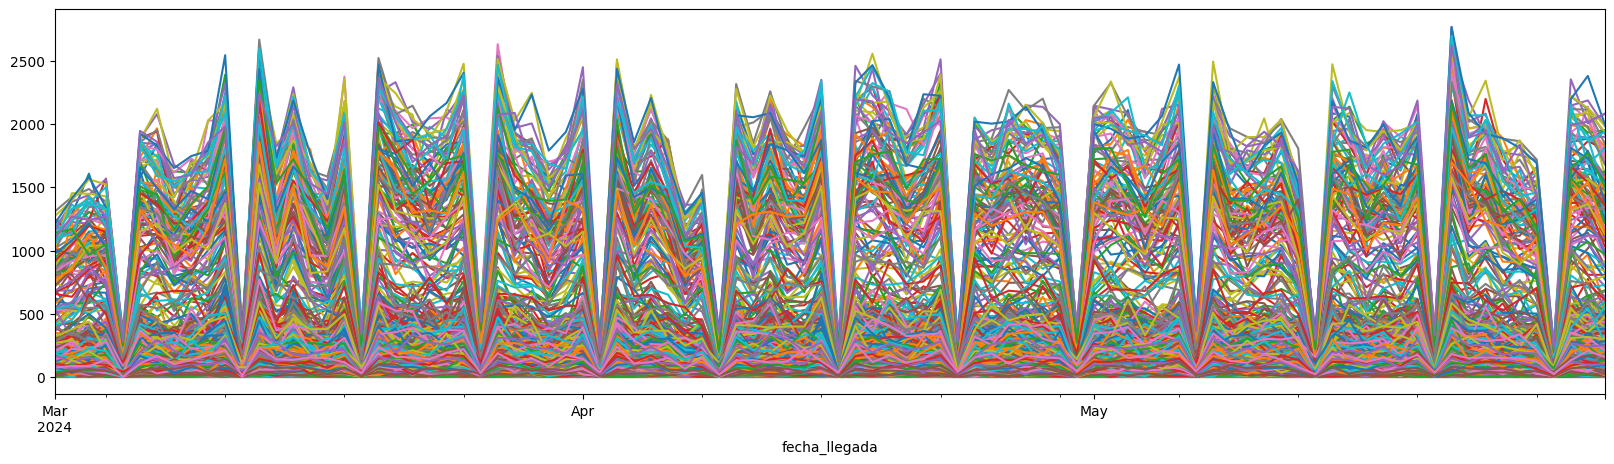

In [7]:
# Plotting general demand

ax = df.plot(figsize=(20, 5))

ax.legend_.remove()

plt.show()

In [8]:
df.to_csv('./data/sd_competencia/demanda_CEDI_simplificado.csv', encoding='utf-8')

In [24]:
# Plot demand by subcategory

sku_subcats = pd.read_sql_query('select sku, subcategoria from Catalogo_Productos group by sku;', con)

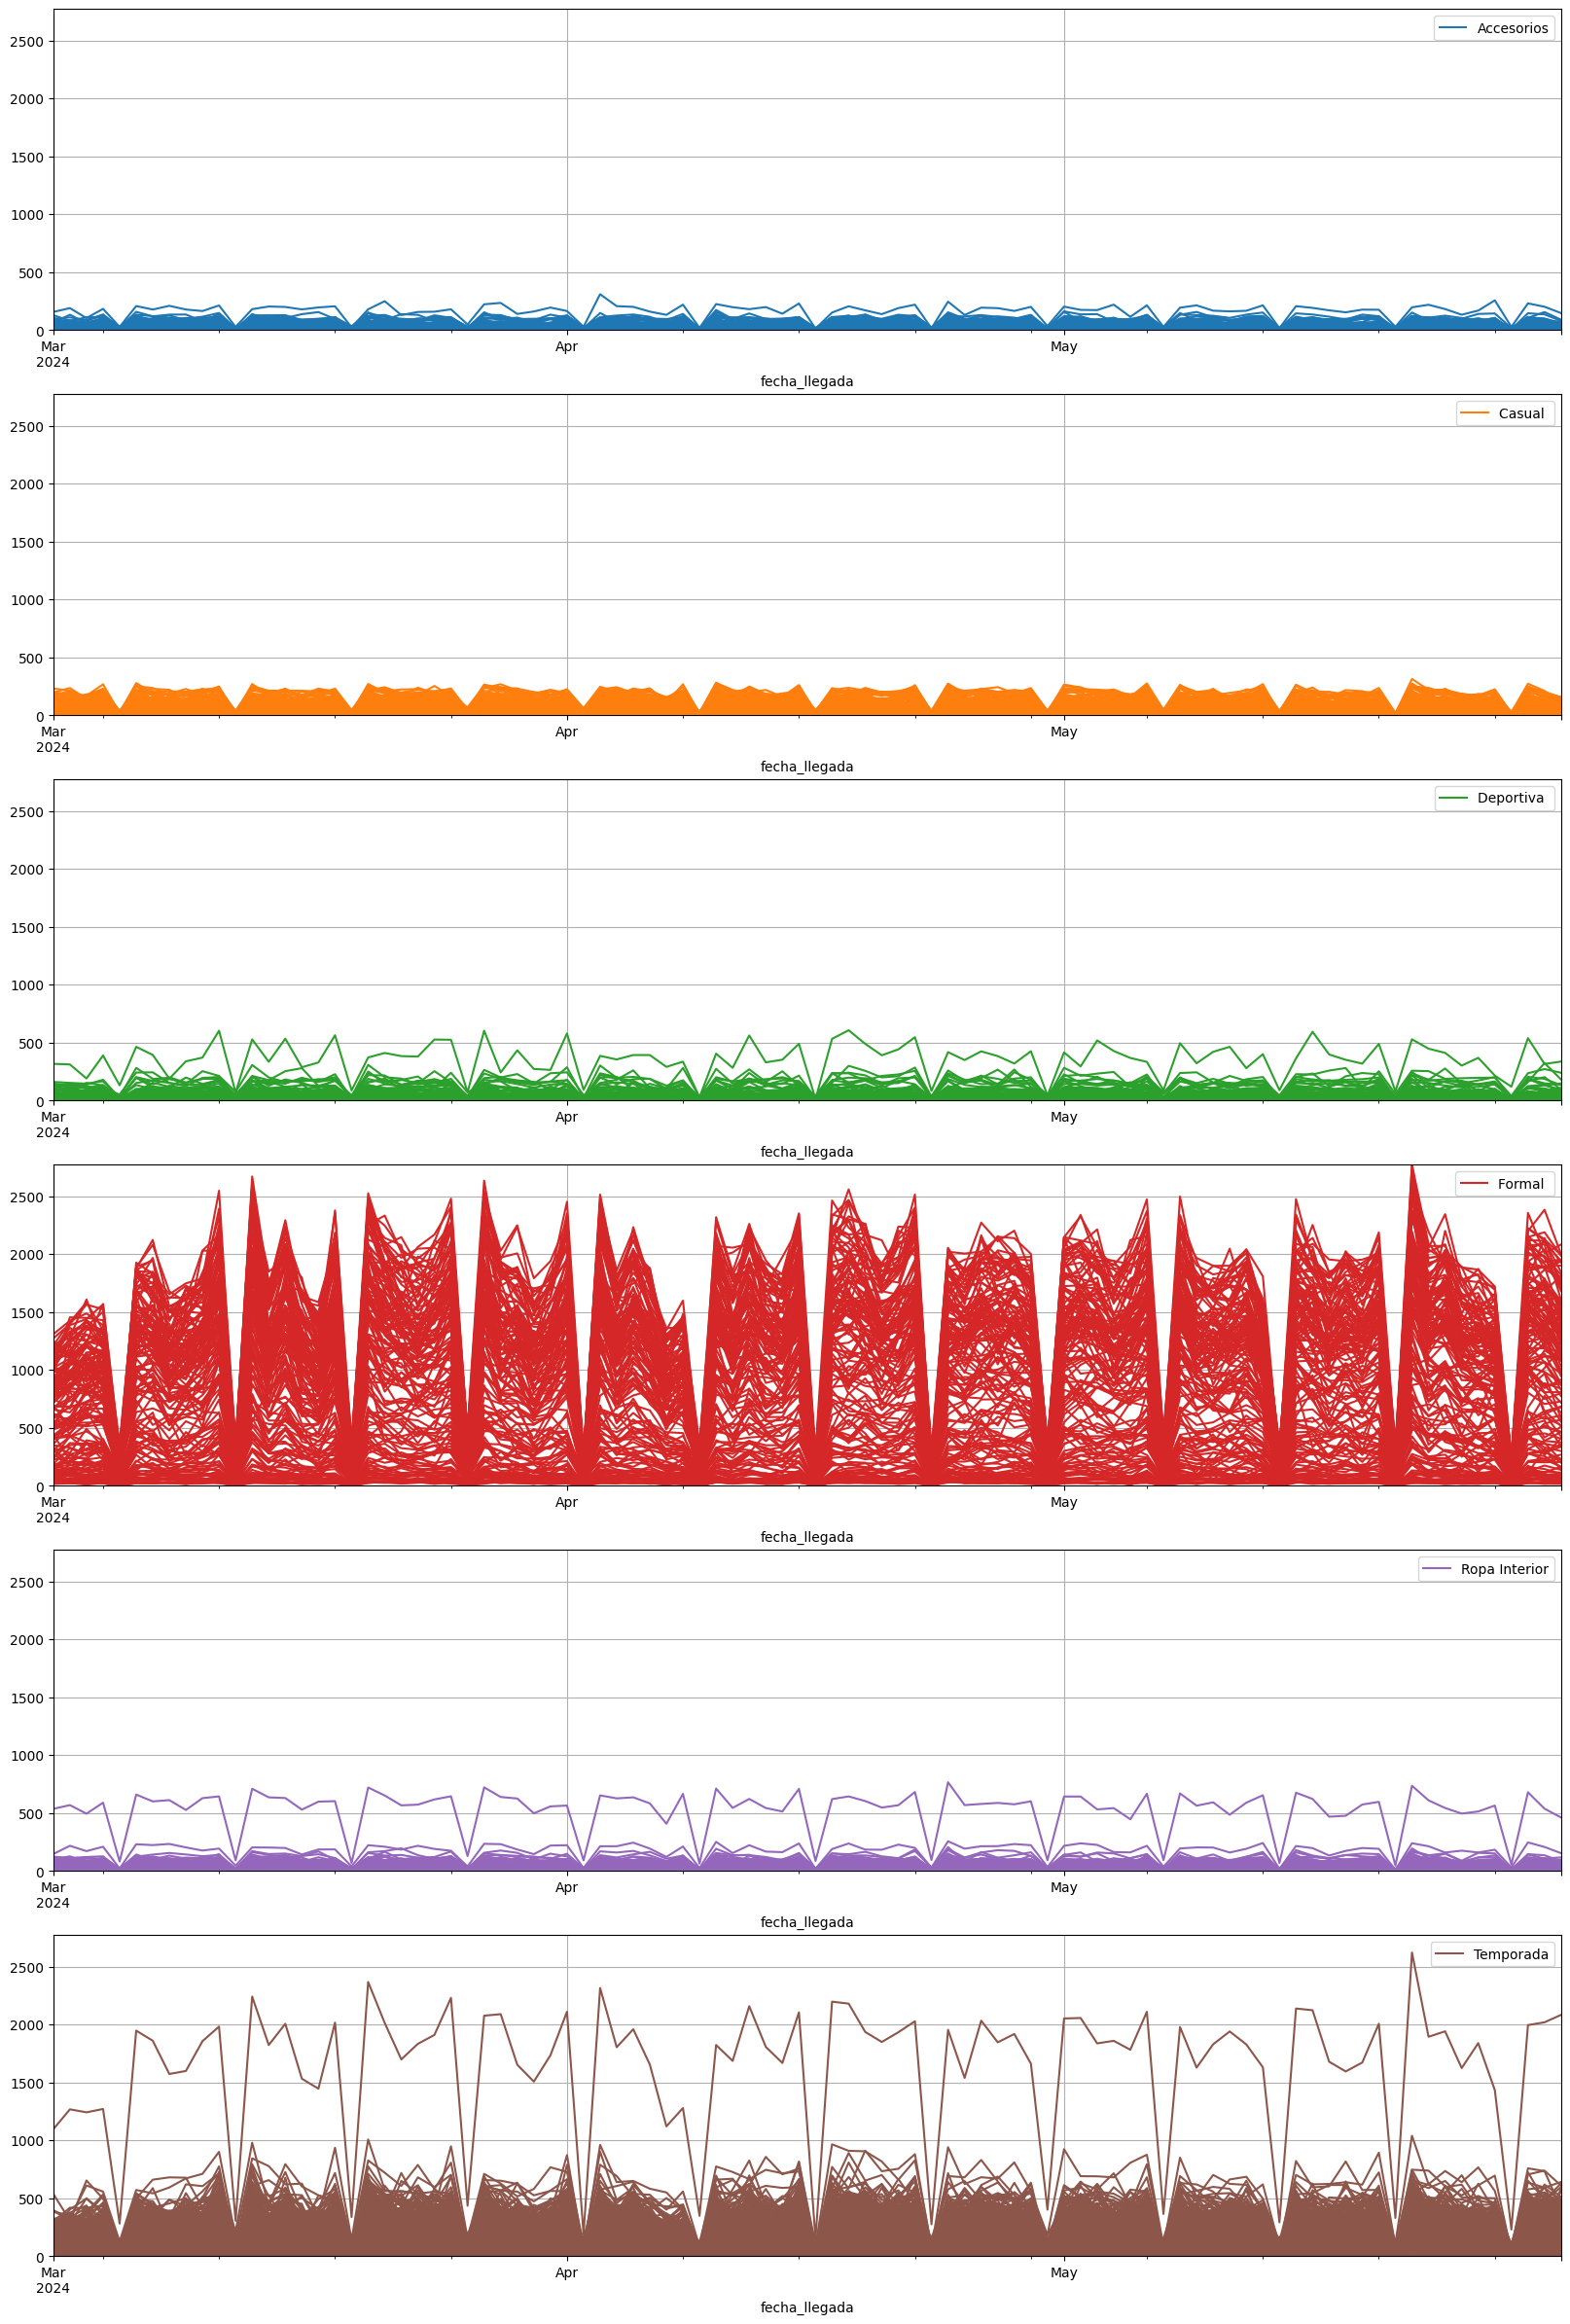

In [ ]:

sku_subcats_dict = sku_subcats.set_index('sku')['subcategoria'].to_dict()

# Assign colors by subcategory
unique_subcategories = sku_subcats['subcategoria'].unique()

# Subplots
fig, axs = plt.subplots(len(sku_subcats['subcategoria'].unique()), figsize=(20, len(sku_subcats['subcategoria'].unique()) * 5))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_subcategories)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category in enumerate(unique_subcategories):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in sku_subcats_dict.items() if cat == category]
    
    # Filter the main DataFrame to include only these SKUs
    subcategory_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    subcategory_df.plot(ax=axs[idx], color=colors[idx], label=category, legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category])
    axs[idx].grid()

plt.show()

In [11]:
# Plot demand by material category

skus_matcat = pd.read_sql_query('select sku, categoria_material from Catalogo_Productos group by sku;', con)

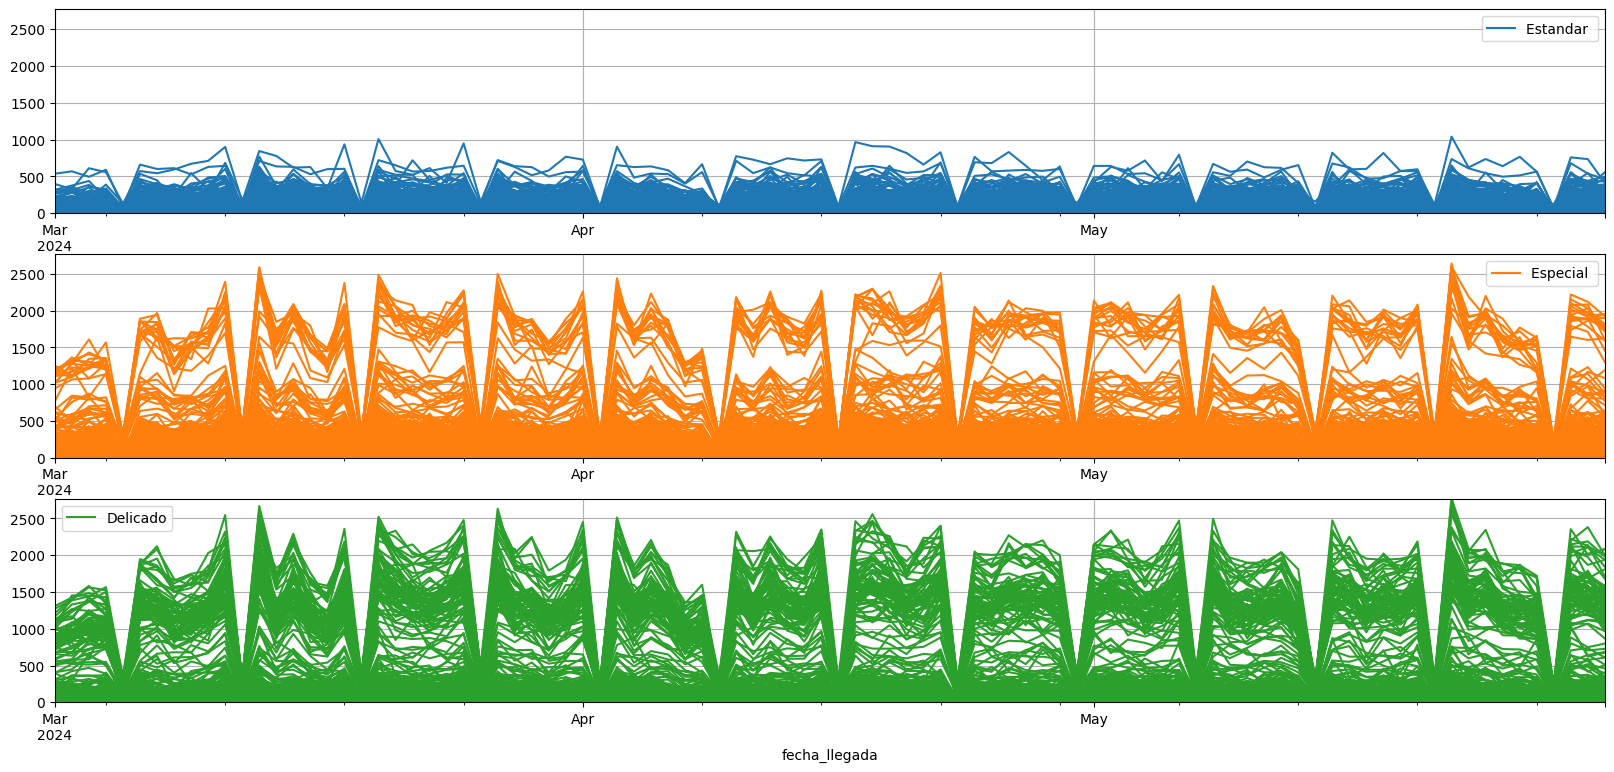

In [30]:

skus_matcat_dict = skus_matcat.set_index('sku')['categoria_material'].to_dict()

# Assign colors by subcategory
unique_categories_material = skus_matcat['categoria_material'].unique()

fig, axs = plt.subplots(len(skus_matcat['categoria_material'].unique()), figsize = (20,len(skus_matcat['categoria_material'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_categories_material)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category_material in enumerate(unique_categories_material):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in skus_matcat_dict.items() if cat == category_material]
    
    # Filter the main DataFrame to include only these SKUs
    category_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    category_df.plot(ax=axs[idx], color=colors[idx], legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category_material])
    axs[idx].grid()

plt.show()

In [13]:
# Plot demand by sum of quantity per date per subcategory
df_subcats = pd.read_sql('select mel.fecha_llegada, sum(mel.quantity) as sum_quantity, cp.subcategoria from Demanda_Historica_Melted as mel left join main.Catalogo_Productos as cp on cp.sku = mel.SKU group by mel.fecha_llegada, subcategoria', con)

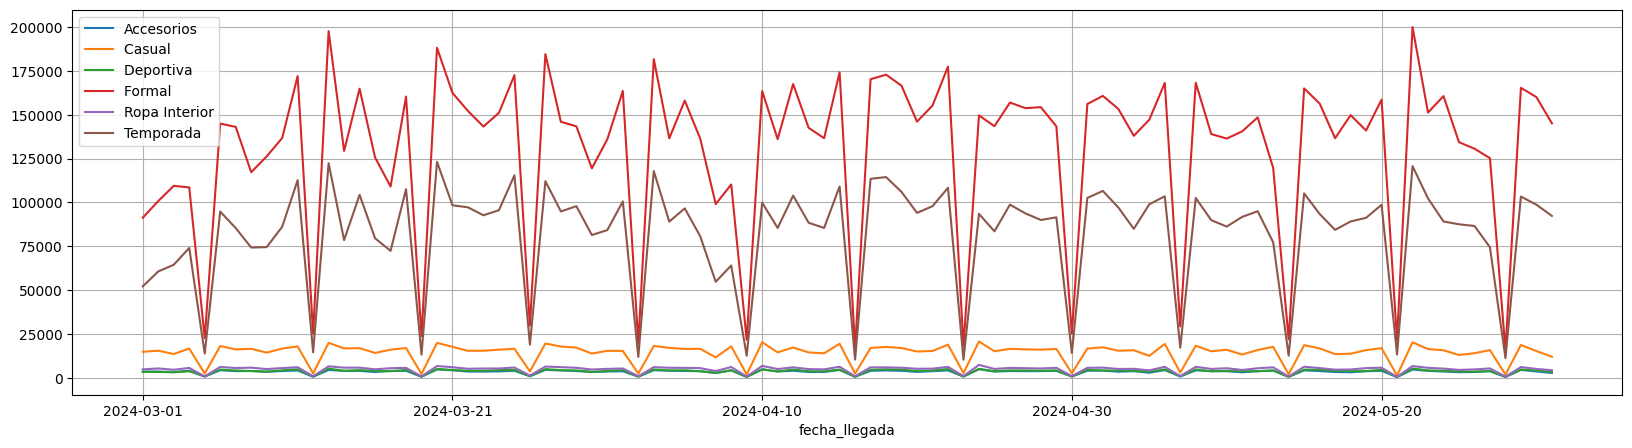

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))

for cat in df_subcats['subcategoria'].unique():
    temp_df = df_subcats[df_subcats['subcategoria'] == cat]
    temp_df.plot(x='fecha_llegada', y='sum_quantity', ax=ax, label=cat)

# Add details to plot
ax.grid()
plt.show()


In [15]:
# Plot demand by product name

sku_names = pd.read_sql_query('select sku, nombre_producto from Catalogo_Productos group by sku;', con)

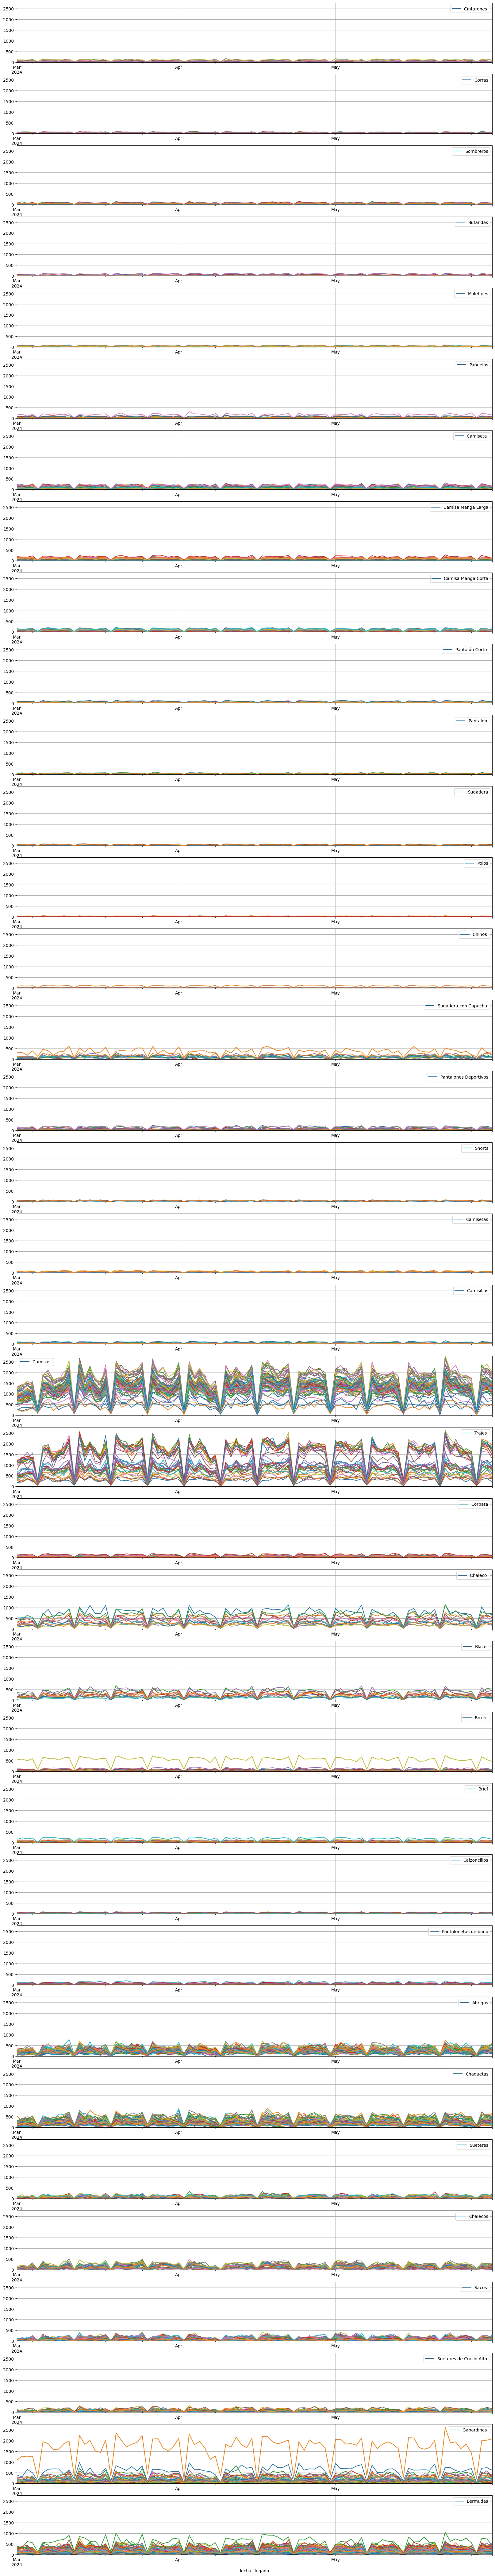

In [39]:
sku_names_dict = sku_names.set_index('sku')['nombre_producto'].to_dict()

# Assign colors by subcategory
sku_names_unique = sku_names['nombre_producto'].unique()

fig, axs = plt.subplots(len(sku_names['nombre_producto'].unique()), figsize=(20, len(sku_names['nombre_producto'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Loop over each category to create a separate DataFrame for each and plot it
for idx, name in enumerate(sku_names_unique):
    # Select SKUs that belong to the current category
    skus_in_name = [sku for sku, nam in sku_names_dict.items() if nam == name]
    
    # Filter the main DataFrame to include only these SKUs
    names_df = df[skus_in_name]
    
    # Plot the sum of demand for this category over time
    names_df.plot(ax=axs[idx], legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([name])
    axs[idx].grid()

plt.show()